In [138]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df=pd.read_csv('luis-daten.csv', sep=',',header = [0])
df_train = df.loc[df['Train'] == 1]
df_test = df.loc[df['Train'] == 1]
y_train = np.array([int(x>35) for x in df_train['PM10'].values.tolist()])
y_test = np.array([int(x>35) for x in df_test['PM10'].values.tolist()])
X_train = np.array(df_train.iloc[:,3:6].values)
X_test =  np.array(df_test.iloc[:,3:6].values)

In [140]:
##logistic regression

import sklearn.linear_model as lm

logistic_regression = lm.LogisticRegression(solver = 'liblinear', warm_start = True).fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate_lr = 1 - accuracy
error_rate_lr

0.16666666666666663

In [142]:
##KNN

import sklearn.neighbors as knn

k_nearest_neighbours = knn.KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train) #biased?

y_pred = k_nearest_neighbours.predict(X_test)

accuracy = accuracy_score(y_test, y_pred,normalize=True)
error_rate_knn = 1 - accuracy
error_rate_knn

0.0

In [143]:
##LDA 

import sklearn.discriminant_analysis as dm

linear_discriminant_analysis = dm.LinearDiscriminantAnalysis(solver = 'svd').fit(X_train, y_train) #'lsqr', 'eigen'

y_pred = linear_discriminant_analysis.predict(X_test)

accuracy = accuracy_score(y_test, y_pred,normalize=True)
error_rate_lda = 1 - accuracy
error_rate_lda

0.15000000000000002

In [144]:
##decision tree
import sklearn.tree as tree

decision_tree = tree.DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 2).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred,normalize=True)
error_rate_dt = 1 - accuracy
error_rate_dt


0.033333333333333326

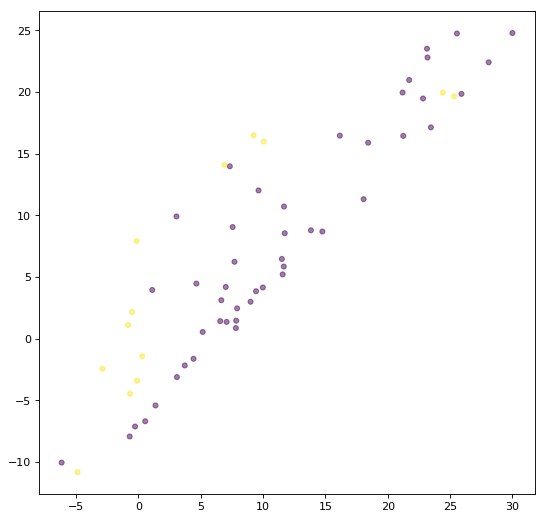

In [145]:
import numpy as np
import matplotlib.pyplot as plt

X_data = X_train+ X_test
y_data = y_train+ y_test



x = X_data[:,1]
y = X_data[:,0]
colors = y_data
area = 20

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#rcParams["figure.figsize"] = [6.4, 4.8]
plt.show()